# Shrimper's Trust Membership Report

In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
from members.data import load_members

members = load_members("../data/members.csv")

print(f"Imported {len(members)} members.")

Imported 1594 members.


## Headlines

In [47]:
from datetime import datetime, timedelta
print("Report run on: ", datetime.today())
print("Number of members: ", len(members))
date_thirty_days_ago = datetime.today() - timedelta(days=30)
print("Number of new members (last 30 days): ", len([m for m in members if m.date_joined and m.date_joined > date_thirty_days_ago]))

Report run on:  2024-11-10 14:59:35.269445
Number of members:  1594
Number of new members (last 30 days):  3


## Age and gender distribution of members

Genders are guessed based on first names

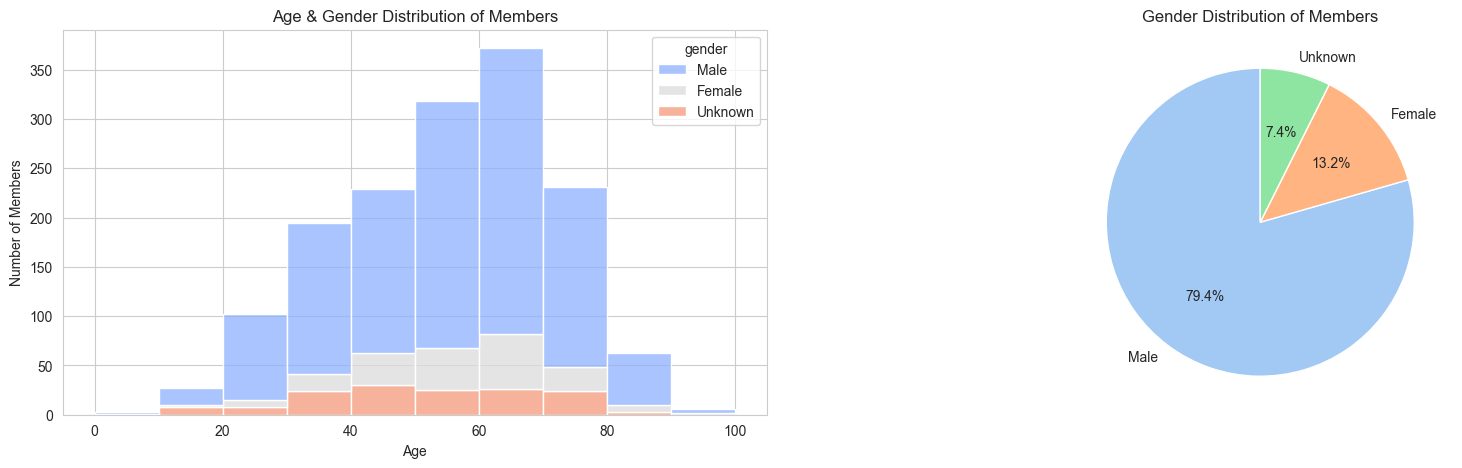

In [45]:
from members.charts import plot_age_distribution
from members.charts.membership import plot_gender_distibution_pie, plot_age_and_gender_distribution

fig, (ax1, ax2) = plt.subplots(1, 2)
plot_gender_distibution_pie(ax2, members)
plot_age_and_gender_distribution(ax1, members)
fig.set_size_inches(20, 5)

plt.show()

## Membership

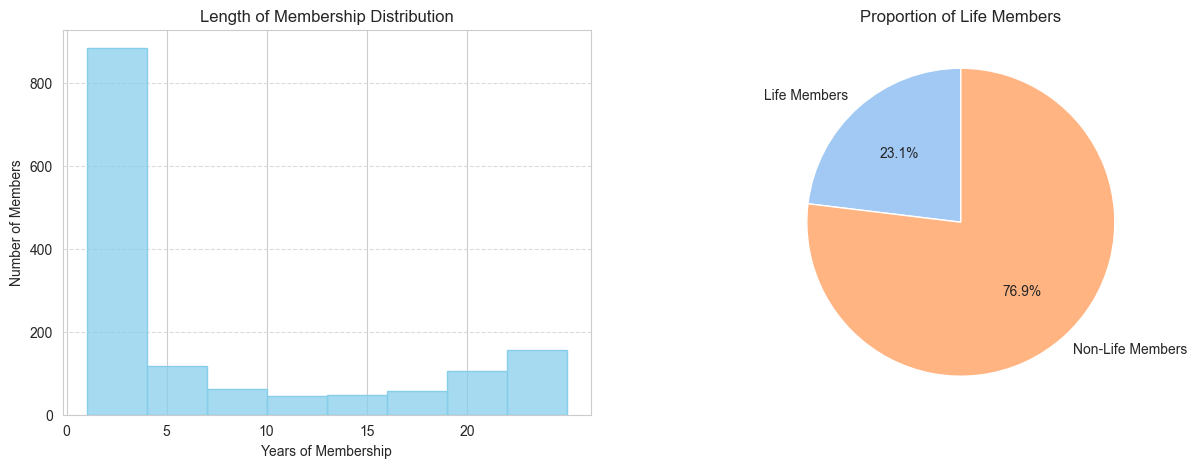

In [46]:
from members.charts import plot_length_of_membership_distribution, plot_pie_of_life_members

fig, (ax1, ax2) = plt.subplots(1, 2)
plot_length_of_membership_distribution(ax1, members)
plot_pie_of_life_members(ax2, members)
fig.set_size_inches(15, 5)

plt.show()

## Renewals

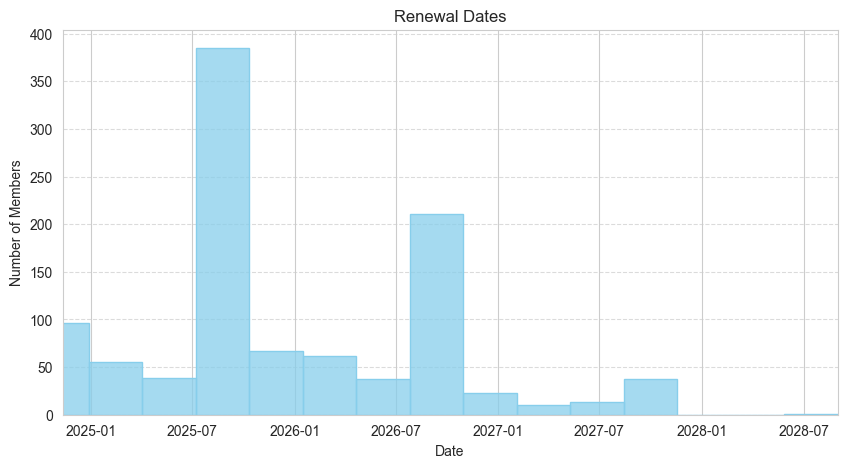

In [28]:
from members.charts import plot_renewal_dates

fig, (ax1) = plt.subplots(1, 1)
plot_renewal_dates(ax1, members)
fig.set_size_inches(10, 5)

plt.show()

## Location

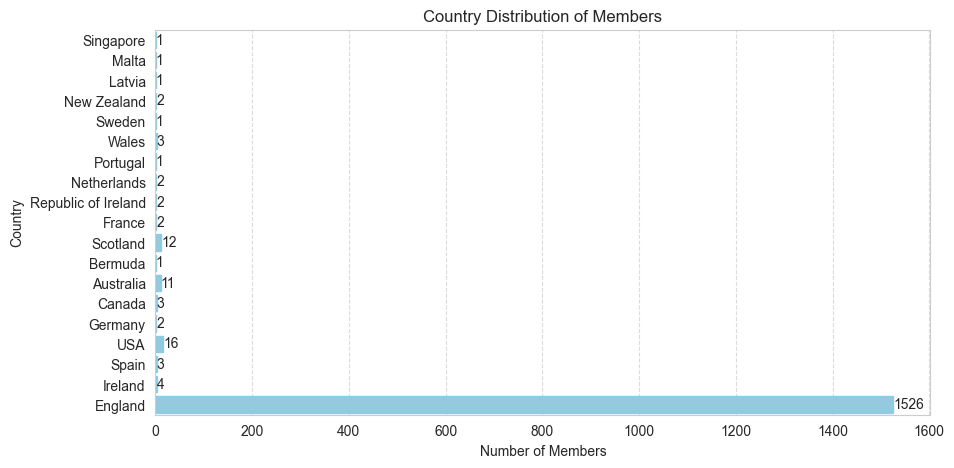

In [29]:
from members.charts.location import plot_country_distribution

fig, (ax1) = plt.subplots(1, 1)
plot_country_distribution(ax1, members)
fig.set_size_inches(10, 5)

plt.show()

In [33]:
import gmplot
import os
apikey = '' # (your API key here)
southend = [51.540674,0.6947368]
gmap = gmplot.GoogleMapPlotter(*southend, 14, apikey=os.environ["GOOGLE_API_KEY"])

member_locations = [m.location for m in members]

attractions = zip(*member_locations)

gmap.heatmap(
    *attractions,
    radius=30,
    gradient=[
    (128, 0, 0, 0.2),     # Dark Red (more transparent)
    (255, 128, 0, 0.4),   # Orange-Red
    (255, 255, 0, 0.6),   # Yellow
    (255, 255, 128, 1)  # Light Yellow (less transparent)
    ]
)

# Not displayed because of
gmap.draw('members.html')